In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
data=pd.read_csv('/kaggle/input/amazon/amazon_alexa.tsv',delimiter='\t')

In [7]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
data['verified_reviews'] = data['verified_reviews'].astype('str')

In [10]:
top_var=data.variation.value_counts()[:5]

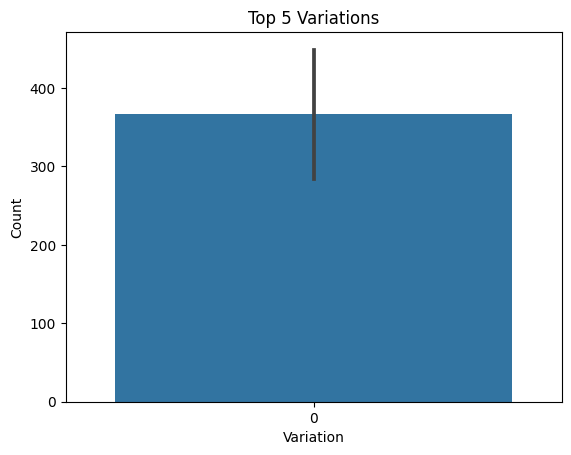

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(top_var)
plt.xlabel('Variation')
plt.ylabel('Count')
plt.title('Top 5 Variations')
plt.show()

In [12]:
data.shape

(3150, 5)

In [13]:
def length(s):
    return len(s)

In [14]:
data['length']=data['verified_reviews'].apply(length)

In [15]:
data['length']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: length, Length: 3150, dtype: int64

In [16]:
data['length'].isna().value_counts()

length
False    3150
Name: count, dtype: int64

In [17]:
data.groupby('length').describe().sample(10)

rating                                                feedback          \
        count      mean       std  min   25%  50%   75%  max    count    mean   
length                                                                          
684       3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      3.0  1.0000   
117       8.0  3.125000  1.552648  1.0  1.75  4.0  4.00  5.0      8.0  0.6250   
161       4.0  4.500000  0.577350  4.0  4.00  4.5  5.00  5.0      4.0  1.0000   
106      16.0  4.625000  1.024695  1.0  5.00  5.0  5.00  5.0     16.0  0.9375   
462       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0  1.0000   
519       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0  1.0000   
52       14.0  4.714286  0.726273  3.0  5.00  5.0  5.00  5.0     14.0  1.0000   
158       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0  1.0000   
304       2.0  3.000000  2.828427  1.0  2.00  3.0  4.00  5.0      2.0  0.5000   
954       2.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0      2.0  1.0000   

                                             
             std  min   25%  50%   75%  max  
length                                       
684     0.000000  1.0  1.00  1.0  1.00  1.0  
117     0.517549  0.0  0.00  1.0  1.00  1.0  
161     0.000000  1.0  1.00  1.0  1.00  1.0  
106     0.250000  0.0  1.00  1.0  1.00  1.0  
462     0.000000  1.0  1.00  1.0  1.00  1.0  
519          NaN  1.0  1.00  1.0  1.00  1.0  
52      0.000000  1.0  1.00  1.0  1.00  1.0  
158     0.000000  1.0  1.00  1.0  1.00  1.0  
304     0.707107  0.0  0.25  0.5  0.75  1.0  
954     0.000000  1.0  1.00  1.0  1.00  1.0

In [18]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.177083   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.604896  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [19]:
rat=data.rating.value_counts()

<Axes: xlabel='rating'>

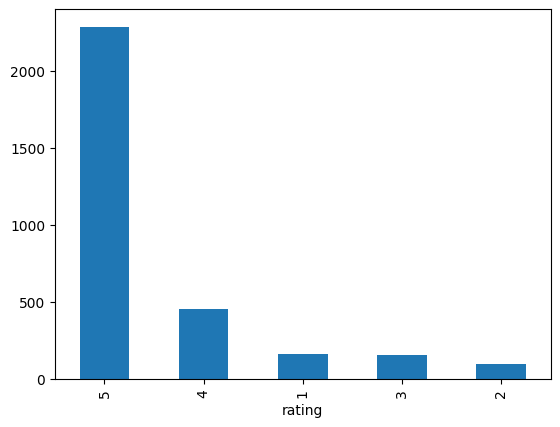

In [20]:
rat.plot(kind='bar')

In [21]:
leng = data.length.value_counts()[:10]

<Axes: xlabel='length'>

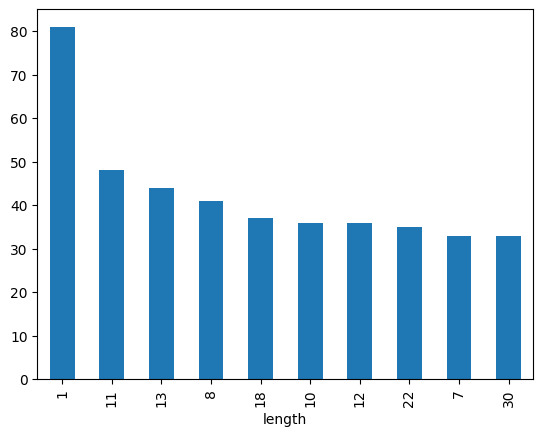

In [22]:
leng.plot(kind='bar')

In [23]:
data[data['length']==1]['verified_reviews'].iloc[0]

'😍'

In [24]:
data[data['length']==25]['verified_reviews'].iloc[0]

'I love it, wife hates it.'

In [25]:
data[data['length']==60]['verified_reviews'].iloc[0]

"Love it - am using it strictly for music now and it's great!"

<Axes: xlabel='rating', ylabel='length'>

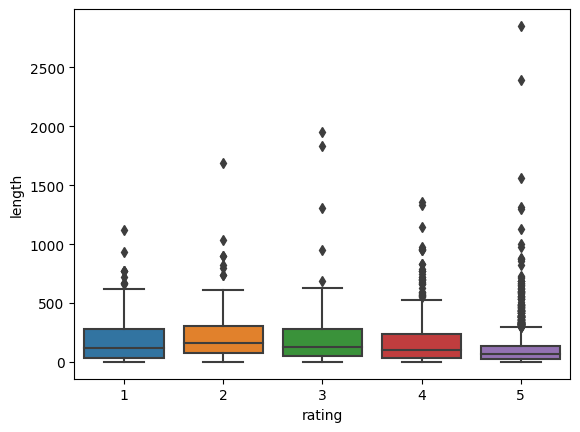

In [26]:
sns.boxplot(y=data['length'],x=data['rating'])

<Axes: xlabel='feedback', ylabel='rating'>

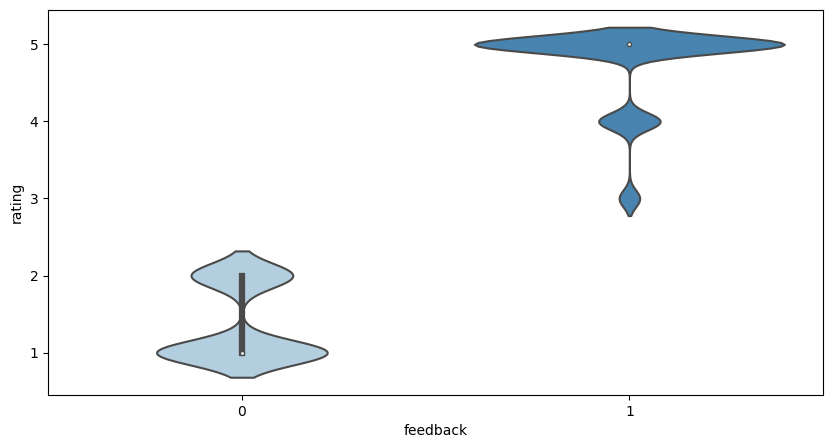

In [27]:
#violin plot
plt.figure(figsize=[10,5])
sns.violinplot(x=data['feedback'],y=data['rating'],palette='Blues')

In [28]:
data.variation.value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
w_v=cv.fit_transform(data.verified_reviews)

In [30]:
w_v.toarray().shape

(3150, 3785)

In [31]:
sw=w_v.sum(axis=0)
sw

matrix([[4, 1, 1, ..., 1, 1, 1]])

In [32]:
cv.vocabulary_

{'love': 2029,
 'echo': 1095,
 'loved': 2030,
 'playing': 2472,
 'game': 1413,
 'answer': 236,
 'question': 2624,
 'correctly': 796,
 'alexa': 190,
 'says': 2886,
 'got': 1473,
 'wrong': 3753,
 'answers': 239,
 'like': 1955,
 'able': 79,
 'turn': 3498,
 'lights': 1954,
 'away': 337,
 'home': 1616,
 'lot': 2023,
 'fun': 1395,
 'thing': 3387,
 'yr': 3776,
 'old': 2290,
 'learns': 1927,
 'dinosaurs': 980,
 'control': 770,
 'play': 2469,
 'games': 1414,
 'categories': 564,
 'nice': 2231,
 'sound': 3116,
 'music': 2183,
 'received': 2682,
 'gift': 1444,
 'needed': 2211,
 'bluetooth': 436,
 'easily': 1091,
 'accessible': 89,
 'smart': 3062,
 'speaker': 3137,
 'wait': 3644,
 'having': 1558,
 'cellphone': 575,
 'use': 3577,
 'features': 1300,
 'ipad': 1804,
 'great': 1495,
 'alarm': 183,
 'deaf': 881,
 'hear': 1571,
 'bedroom': 385,
 'living': 1983,
 'room': 2843,
 'reason': 2671,
 'ask': 288,
 'random': 2643,
 'questions': 2626,
 'response': 2808,
 'does': 1037,
 'smartbon': 3063,
 'politics'

In [33]:
w_s=[(w,sw[0,indx]) for w,indx in cv.vocabulary_.items()]
w_s

[('love', 956),
 ('echo', 839),
 ('loved', 42),
 ('playing', 70),
 ('game', 2),
 ('answer', 32),
 ('question', 15),
 ('correctly', 10),
 ('alexa', 632),
 ('says', 26),
 ('got', 133),
 ('wrong', 15),
 ('answers', 19),
 ('like', 504),
 ('able', 107),
 ('turn', 94),
 ('lights', 99),
 ('away', 29),
 ('home', 217),
 ('lot', 77),
 ('fun', 155),
 ('thing', 128),
 ('yr', 3),
 ('old', 50),
 ('learns', 8),
 ('dinosaurs', 1),
 ('control', 75),
 ('play', 215),
 ('games', 29),
 ('categories', 1),
 ('nice', 98),
 ('sound', 340),
 ('music', 540),
 ('received', 20),
 ('gift', 50),
 ('needed', 27),
 ('bluetooth', 57),
 ('easily', 30),
 ('accessible', 2),
 ('smart', 184),
 ('speaker', 241),
 ('wait', 17),
 ('having', 133),
 ('cellphone', 2),
 ('use', 469),
 ('features', 66),
 ('ipad', 4),
 ('great', 729),
 ('alarm', 113),
 ('deaf', 3),
 ('hear', 50),
 ('bedroom', 80),
 ('living', 37),
 ('room', 129),
 ('reason', 36),
 ('ask', 113),
 ('random', 8),
 ('questions', 68),
 ('response', 18),
 ('does', 148),
 

In [34]:
w_s=sorted(w_s,key=lambda x:x[1],reverse=True)

In [35]:
freq=pd.DataFrame(w_s,columns=['word','frequency'])

<Axes: xlabel='word'>

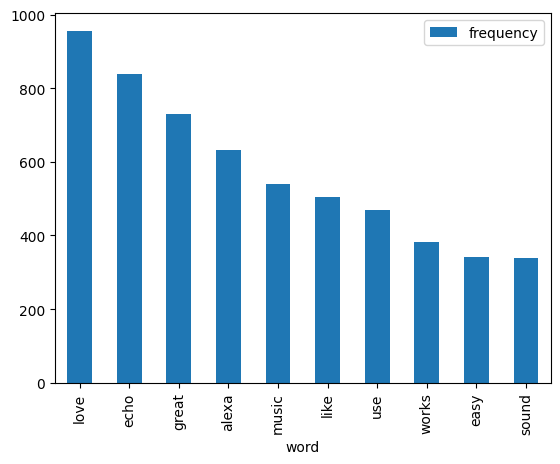

In [36]:
freq.head(10).plot(x='word',y='frequency',kind='bar')

Text(0.5, 1.0, 'Review Vocabulary')

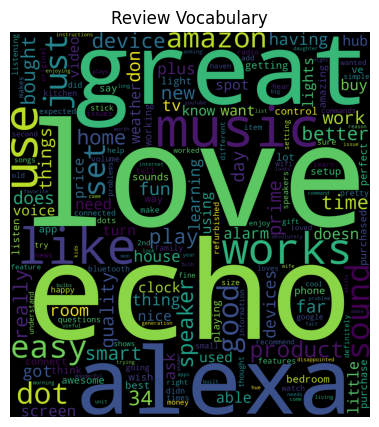

In [37]:
from wordcloud import WordCloud
word_cloud=WordCloud(width=1400,height=1500).generate_from_frequencies(dict(w_s))
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(word_cloud)
plt.title('Review Vocabulary')

In [38]:
#preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
sw=set(stopwords.words('english'))
sw.remove('not')
c=[]
for i in range(data.shape[0]):
    r=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    r=r.lower()
    r=r.split()
    r=[stemmer.stem(word) for word in r if word not in sw]
    r=' '.join(r)
    c.append(r)

In [41]:
#count vectorizer
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(c).toarray()
y=data.iloc[:,4].values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)

<Axes: >

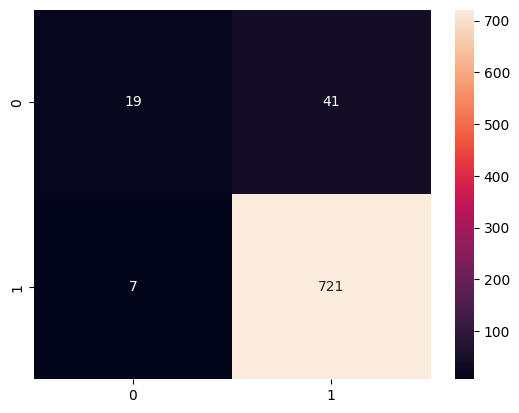

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='g')

In [62]:
#Hyperparameter tuning
params={
    'min_samples_split':[6,7,8],
    'n_estimators':[100,200,300],
    'max_depth':[60,70,80]
}
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [60, 70, 80],
                         'min_samples_split': [6, 7, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [63]:
gcv.best_params_

{'max_depth': 80, 'min_samples_split': 6, 'n_estimators': 200}

In [67]:
gcv.best_score_

0.9293017880818433

In [68]:
rf=RandomForestClassifier(max_depth=80,n_estimators=200,min_samples_split=6)
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)

<Axes: >

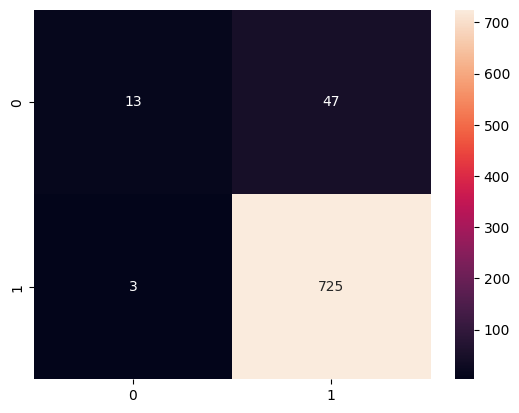

In [69]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='g')